In [2]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram
from qiskit.visualization import plot_state_qsphere

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [3]:
##############################EXERCISE 1#############################################

#Define multi-qubit controlled Z-gate for n=2,3 or 4.
#n=2
def cz(circuit,qr):
    circuit.h(qr[1])
    circuit.cx(qr[0],qr[1])
    circuit.h(qr[1])
#n=3
def ccz(circuit,qr):
    circuit.h(qr[2])
    # ccx is the Toffoli gate 
    circuit.ccx(qr[0], qr[1], qr[2])
    circuit.h(qr[2])
#n=4
def cccz(circuit,qr):
    pi = math.pi
    circuit.cu1(pi/4,qr[0],qr[3])
    circuit.cx(qr[0], qr[1])
    circuit.cu1(-pi/4, qr[1],qr[3])
    circuit.cx(qr[0], qr[1])
    circuit.cu1(pi/4, qr[1],qr[3])
    circuit.cx(qr[1], qr[2])
    circuit.cu1(-pi/4, qr[2],qr[3])
    circuit.cx(qr[0], qr[2])
    circuit.cu1(pi/4, qr[2],qr[3])
    circuit.cx(qr[1], qr[2])
    circuit.cu1(-pi/4, qr[2],qr[3])
    circuit.cx(qr[0], qr[2])
    circuit.cu1(pi/4, qr[2],qr[3])
#Definition
def n_controlled_Z(circuit, qr):
    """Implement a Z gate with multiple controls"""
    if (len(qr) > 4):
        raise ValueError('The controlled Z with more than 3 controls is not implemented')
    # This is the case n = 2 (1 control + 1 target qubit)
    elif (len(qr) == 2):
        cz(circuit,qr)
    # This is the case n = 3 (2 control + 1 target qubit)
    elif (len(qr) == 3):
        ccz(circuit,qr)
        # This is the case n = 4 (3 control + 1 target qubit)
    elif (len(qr) == 4):
        cccz(circuit,qr)
#Now we check if this fuction ihas the same function as a multi-qubit controlled Z-gate. (ex.|11>->-|11>).

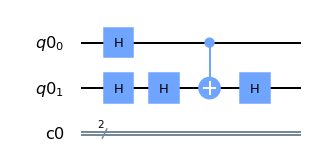

In [4]:
#####n=2####

##Circuitn2, input=all posible states.
#Create the circuit
qrn2=QuantumRegister(2)
crn2=ClassicalRegister(2)
circuitn2=QuantumCircuit(qrn2,crn2)
#Built all the posible input states using H-gates.
circuitn2.h(0)
circuitn2.h(1)
#Apply our function.
n_controlled_Z(circuitn2, qrn2)
#Draw the circuit.
circuitn2.draw()

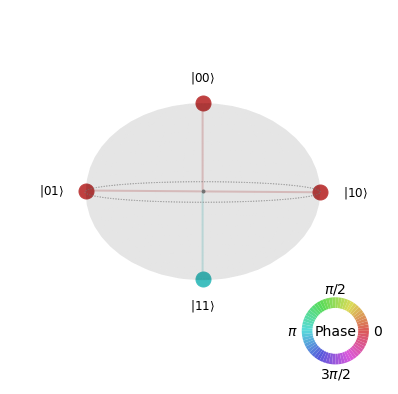

In [5]:
#Execute the quantum circuit using qasm simulator.
backend = BasicAer.get_backend('statevector_simulator')
result = execute(circuitn2, backend).result()
psin2 = result.get_statevector(circuitn2)
#Print and plot the results.
plot_state_qsphere(psin2)


{'10': 2464, '00': 2546, '01': 2536, '11': 2454}


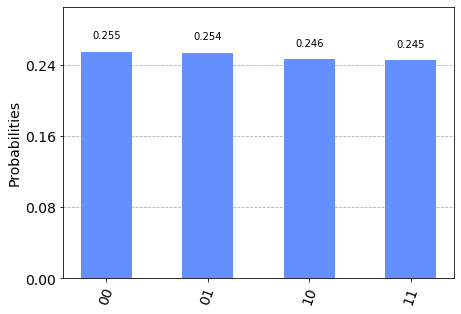

In [6]:
#Measure.
circuitn2.measure([0,1],[0,1])
#Execute the quantum circuit using qasm simulator.
backend = BasicAer.get_backend('qasm_simulator')
result = execute(circuitn2, backend, shots=10000).result()
countsn2  = result.get_counts(circuitn2)
#Print and plot the results.
print(countsn2)
plot_histogram(countsn2)

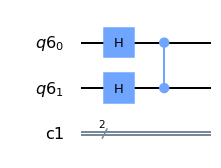

In [7]:
##Circuitn2Z, input=all posible states.
#Create the circuit
qrn2Z=QuantumRegister(2)
crn2Z=ClassicalRegister(2)
circuitn2Z=QuantumCircuit(qrn2Z,crn2Z)
#Built all the posible input states using H-gates.
circuitn2Z.h(0)
circuitn2Z.h(1)
#Apply our function.
circuitn2Z.cz(qrn2Z[0],qrn2Z[1])
#Draw the circuit.
circuitn2Z.draw()

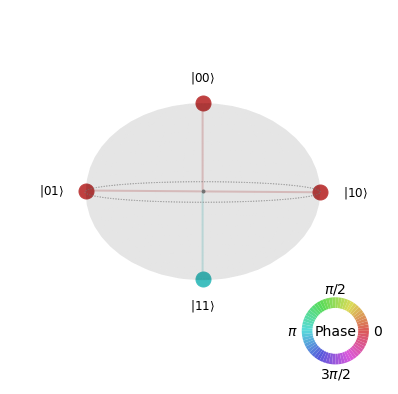

In [8]:
#Execute the quantum circuit using state vector simulator.
backend = BasicAer.get_backend('statevector_simulator')
result = execute(circuitn2Z, backend).result()
psin2Z = result.get_statevector(circuitn2Z)
#Print and plot the results.
plot_state_qsphere(psin2Z)

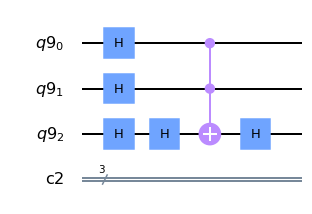

In [9]:
#####n=3####

##Circuitn3, input=all posible states.
#Create the circuit
qrn3=QuantumRegister(3)
crn3=ClassicalRegister(3)
circuitn3=QuantumCircuit(qrn3,crn3)
#Built all the posible input states using H-gates.
circuitn3.h(0)
circuitn3.h(1)
circuitn3.h(2)
#Apply our function.
n_controlled_Z(circuitn3, qrn3)
#Draw the circuit.
circuitn3.draw()

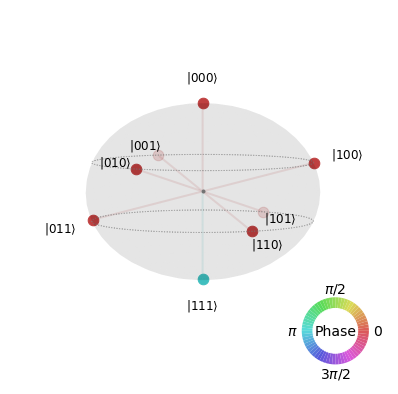

In [10]:
#Execute the quantum circuit using statevector simulator.
backend = BasicAer.get_backend('statevector_simulator')
result = execute(circuitn3, backend).result()
psin3 = result.get_statevector(circuitn3)
#Print and plot the results.
plot_state_qsphere(psin3)

{'101': 1245, '000': 1325, '010': 1245, '011': 1291, '100': 1219, '111': 1180, '001': 1221, '110': 1274}


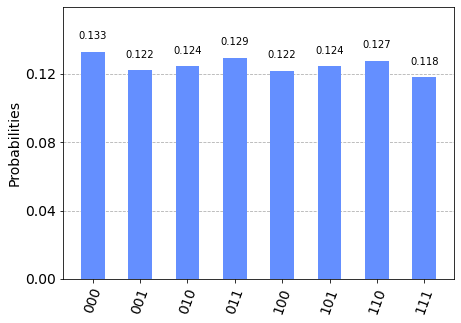

In [11]:
#Measure.
circuitn3.measure([0,1,2],[0,1,2])
#Execute the quantum circuit using qasm simulator.
backend = BasicAer.get_backend('qasm_simulator')
result = execute(circuitn3, backend, shots=10000).result()
countsn3  = result.get_counts(circuitn3)
#Print and plot the results.
print(countsn3)
plot_histogram(countsn3)

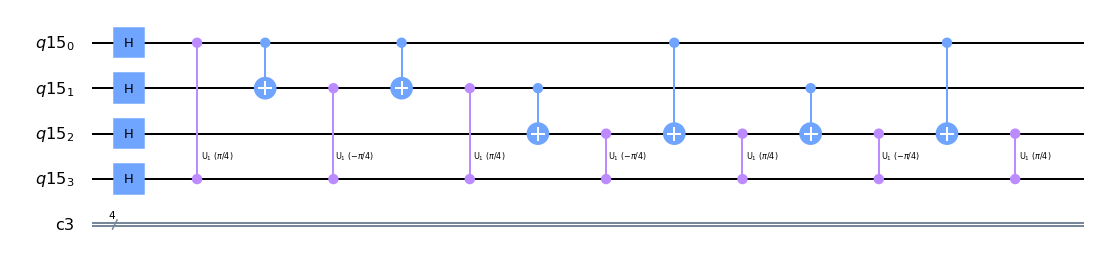

In [12]:
#####n=4####

##Circuitn4, input=all posible states.
#Create the circuit
qrn4=QuantumRegister(4)
crn4=ClassicalRegister(4)
circuitn4=QuantumCircuit(qrn4,crn4)
#Built all the posible input states using H-gates.
circuitn4.h(0)
circuitn4.h(1)
circuitn4.h(2)
circuitn4.h(3)
#Apply our function.
n_controlled_Z(circuitn4, qrn4)
#Draw the circuit.
circuitn4.draw()

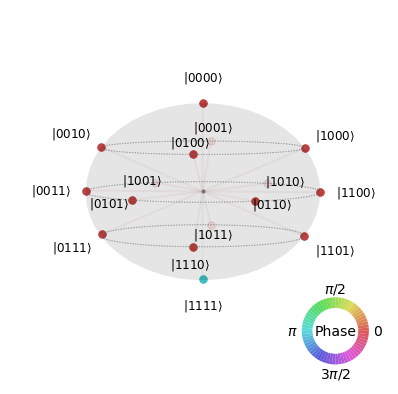

In [13]:
#Execute the quantum circuit using statevector simulator.
backend = BasicAer.get_backend('statevector_simulator')
result = execute(circuitn4, backend).result()
psin4 = result.get_statevector(circuitn4)
#Print and plot the results.
plot_state_qsphere(psin4)

{'1011': 619, '1010': 626, '0000': 684, '0101': 592, '0111': 638, '1001': 571, '1110': 583, '0011': 627, '0010': 594, '1111': 597, '0100': 653, '0110': 653, '1000': 648, '1100': 640, '1101': 634, '0001': 641}


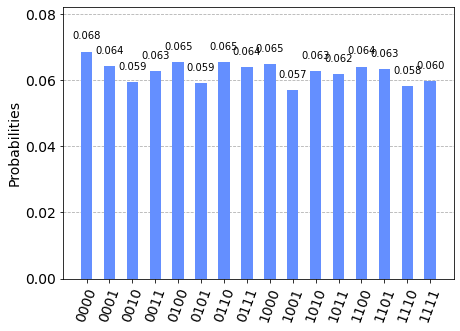

In [14]:
#Measure.
circuitn4.measure([0,1,2,3],[0,1,2,3])
#Execute the quantum circuit using qasm simulator.
backend = BasicAer.get_backend('qasm_simulator')
result = execute(circuitn4, backend, shots=10000).result()
countsn4  = result.get_counts(circuitn4)
#Print and plot the results.
print(countsn4)
plot_histogram(countsn4)

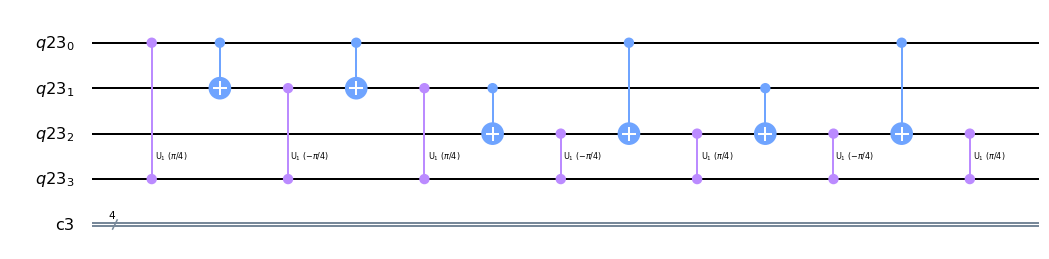

In [15]:
##Circuit0n4, input=|0000>.
#Create the circuit
qr0n4=QuantumRegister(4)
cr0n4=ClassicalRegister(4)
circuit0n4=QuantumCircuit(qr0n4,crn4)
#The states are already 0.
#Apply our function.
n_controlled_Z(circuit0n4, qr0n4)
#Draw the circuit.
circuit0n4.draw()

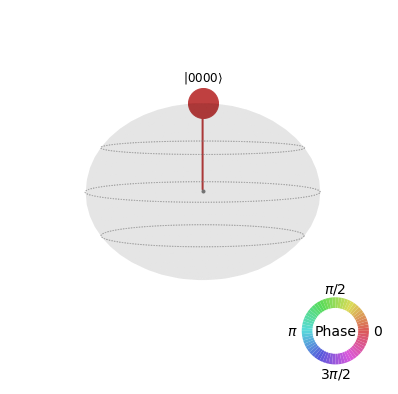

In [16]:
#Execute the quantum circuit using statevector simulator.
backend = BasicAer.get_backend('statevector_simulator')
result = execute(circuit0n4, backend).result()
psi0n4 = result.get_statevector(circuit0n4)
#Print and plot the results.
plot_state_qsphere(psi0n4)

In [17]:
##############################EXERCISE 2#############################################

#Check whether Oracle acts as expected.
#Define Oracle
def phase_oracle(circuit,qr,element):
    # element is an array that defines the searched element, for example, element =  [0,1,0,1]
    n = len(element)
    for j,x in enumerate(element):
        if (x == 0):
            circuit.x(qr[j])
    n_controlled_Z(circuit,qr) 
    for j,x in enumerate(element):
        if (x == 0):
            circuit.x(qr[j])

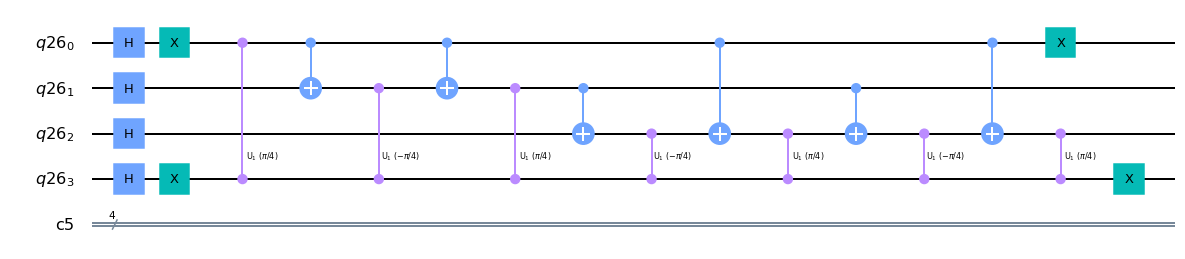

In [18]:
# Create Circuite2, input=all posible states.
#Create the circuit
qre2=QuantumRegister(4)
cre2=ClassicalRegister(4)
circuite2=QuantumCircuit(qre2,cre2)
#Built all the posible input states using H-gates.
circuite2.h(0)
circuite2.h(1)
circuite2.h(2)
circuite2.h(3)
#Chose element to search.
elemente2=[0,1,1,0]
#Apply Oracle.
phase_oracle(circuite2,qre2,elemente2)
#Draw the circuit.
circuite2.draw()

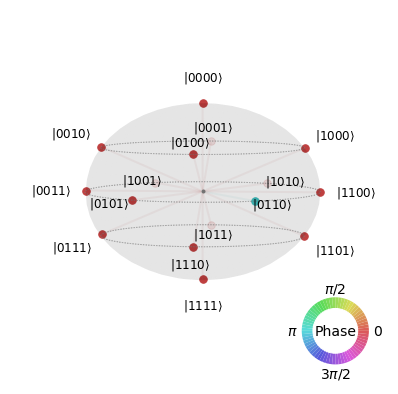

In [19]:
#Execute the quantum circuit using statevector simulator.
backend = BasicAer.get_backend('statevector_simulator')
result = execute(circuite2, backend).result()
psie2 = result.get_statevector(circuite2)
#Print and plot the results.
plot_state_qsphere(psie2)

{'1000': 634, '0111': 582, '0000': 663, '1011': 604, '1001': 611, '0010': 650, '1101': 616, '0100': 656, '0110': 618, '0001': 615, '1100': 604, '1110': 646, '0011': 633, '0101': 640, '1010': 625, '1111': 603}


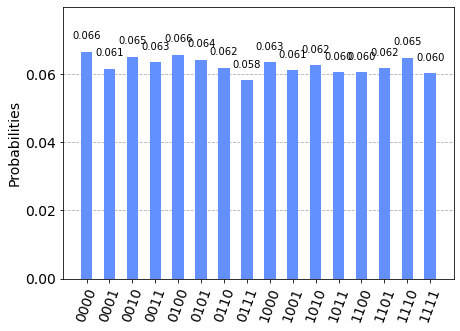

In [20]:
#Measure.
circuite2.measure([0,1,2,3],[0,1,2,3])
#Execute the quantum circuit using qasm simulator.
backend = BasicAer.get_backend('qasm_simulator')
result = execute(circuite2, backend, shots=10000).result()
countse2  = result.get_counts(circuite2)
#Print and plot the results.
print(countse2)
plot_histogram(countse2)

In [21]:
##############################EXERCISE 3#############################################

#Define Inversion 
def inversion_about_average(circuit, register):
    """Apply inversion about the average step of Grover's algorithm."""
    circuit.h(register)
    circuit.x(register)
    n_controlled_Z(circuit, qr)
    circuit.x(register)
    circuit.h(register)

In [22]:
#Circuit that implements the Grover's Algorithm (we define a function in which we introduce our parameters).

def grovers_algorithm(element,R,circuit,qr):
    #circuit=defined input of the circuit.
    #element=[a,b,c,d] with a,b=0,1, array representing the searched element.
    #R=number of repetitions.
    #Apply the algorithm R times.
    for i in range(1,R):
        #Apply Oracle.
        phase_oracle(circuit,qr,element)
        #Apply Inversion.
        inversion_about_average(circuit,qr)




{'0010': 34, '1101': 30, '1010': 459, '0011': 32, '0110': 34, '0101': 39, '0000': 38, '0111': 43, '1001': 40, '1100': 31, '1110': 35, '0001': 42, '0100': 37, '1111': 35, '1000': 30, '1011': 41}


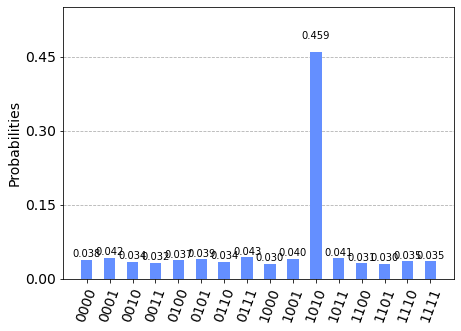

In [30]:
#Ex. searching |1010> 
#Create the circuit and set it with input=all posible states (2^4).
qr=QuantumRegister(4)
cr=ClassicalRegister(4)
circuit=QuantumCircuit(qr,cr)
circuit.h(0)
circuit.h(1)
circuit.h(2)
circuit.h(3)

#Apply the algorithm.
grovers_algorithm([0,1,0,1],2,circuit,qr)

#Plot the circuit.
circuit.draw()

#Measure.
circuit.measure([0,1,2,3],[0,1,2,3])
#Execute the quantum circuit using qasm simulator.
backend = BasicAer.get_backend('qasm_simulator')
result = execute(circuit, backend, shots=1000).result()
counts  = result.get_counts(circuit)
#Print and plot the results.
print(counts)
plot_histogram(counts)


{'111': 935, '000': 10, '101': 10, '110': 11, '011': 10, '100': 4, '001': 13, '010': 7}


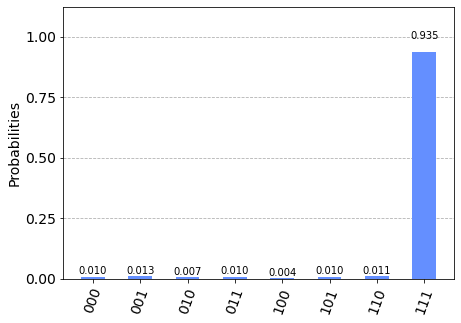

In [28]:
#Ex. searching |111> 
#Create the circuit and set it with input=all posible states (2^4).
qr=QuantumRegister(3)
cr=ClassicalRegister(3)
circuit=QuantumCircuit(qr,cr)
circuit.h(0)
circuit.h(1)
circuit.h(2)

#Apply the algorithm.
grovers_algorithm([1,1,1],3,circuit,qr)

#Plot the circuit.
circuit.draw()

#Measure.
circuit.measure([0,1,2],[0,1,2])
#Execute the quantum circuit using qasm simulator.
backend = BasicAer.get_backend('qasm_simulator')
result = execute(circuit, backend, shots=1000).result()
counts  = result.get_counts(circuit)
#Print and plot the results.
print(counts)
plot_histogram(counts)

{'10': 1000}


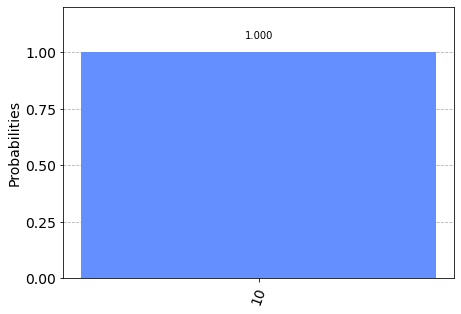

In [29]:
#Ex. searching |00> 
#Create the circuit and set it with input=all posible states (2^4).
qr=QuantumRegister(2)
cr=ClassicalRegister(2)
circuit=QuantumCircuit(qr,cr)
circuit.h(0)
circuit.h(1)

#Apply the algorithm.
grovers_algorithm([0,1],2,circuit,qr)

#Plot the circuit.
circuit.draw()

#Measure.
circuit.measure([0,1],[0,1])
#Execute the quantum circuit using qasm simulator.
backend = BasicAer.get_backend('qasm_simulator')
result = execute(circuit, backend, shots=1000).result()
counts  = result.get_counts(circuit)
#Print and plot the results.
print(counts)
plot_histogram(counts)

In [273]:
##############################EXERCISE 4#############################################
#number of measurements: it's easy to see by changing the parameter shoots that it doesn't really affect the results.
#number of iterations: it must be chosen carefully because it follows a repetitive structure, being R~sqrt(n) a good election.